## EDA and Model training on XGboost work
<h3> importing required libs

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
 
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
sns.set_style("darkgrid")
 
%matplotlib inline


C:\Users\muzamil.hussain\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
churn_data = pd.read_csv(r'C:/Users/muzamil.hussain/churn prediction using XGBOOST and DNN/data_set_telecom.csv')
churn_data.head(5)

,S.No,Account ID,Avg_bill_payment,Cust_age,product_count,exchange,Curr_Data_rate,Conn_catg,cust_catg,no_SRs_in_3Yrs,...,Data_services,Avg_calls_2018,Avg_calls_2019,Avg_calls_2020,Avg_calls_in_3Yrs,avg_usage_2018,avg_usage_2019,avg_usage_2020,Avg_usage_in_3Yrs,churn
0,20512,1.000000e+11,2429,4.7,2,04KHTDAK,6 Mbps,Residential,Gold,2,...,partial,2,0,0,1,125,179,4321,1542,NO
1,32801,2.107212e+09,4390,4.1,2,04BNUMSH,6 Mbps,Forces,Gold,1,...,No,9381,0,0,3127,49,0,0,16,YES
2,32853,2.106854e+09,2623,4.9,2,04BNUMSH,4 Mbps,Forces,Gold,7,...,No,1236,5,0,414,61,0,0,20,YES
3,43286,2.106700e+09,1627,6.0,2,04BNUMSH,8 Mbps,Forces,Gold,2,...,No,963,305,1,423,65,208,802,358,YES
4,43364,2.106447e+09,3426,4.0,2,04BNUMSH,8 Mbps,Forces,Gold,1,...,No,4486,553,0,1680,0,109,0,36,YES


In [3]:
churn_data.shape

(45131, 23)

In [4]:
churn_data.describe()

,S.No,Account ID,Avg_bill_payment,Cust_age,product_count,no_SRs_in_3Yrs,rep_SRs_in_3Yrs,MTTR,Denial in_3Yrs,Avg_calls_2018,Avg_calls_2019,Avg_calls_2020,Avg_calls_in_3Yrs,avg_usage_2018,avg_usage_2019,avg_usage_2020,Avg_usage_in_3Yrs
count,45131.000000,4.513100e+04,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000,45131.000000
mean,22846.121336,4.291859e+10,2893.441204,8.610232,1.824976,6.664266,1.603177,26.152091,6.489198,352.275819,286.025570,144.836277,261.031907,49.401520,75.660920,1159.165363,428.076754
std,13408.908536,4.831450e+10,2601.133683,7.659152,0.636341,10.694684,4.474514,65.118729,12.180524,1230.883979,877.885099,528.723902,777.301853,93.561805,121.776287,1837.804030,661.186580
min,1.000000,3.272510e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11283.500000,1.966732e+09,1489.000000,2.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22566.000000,2.106257e+09,2560.000000,6.100000,2.000000,3.000000,0.000000,20.000000,2.000000,5.000000,6.000000,1.000000,12.000000,0.000000,19.000000,200.000000,108.000000
75%,34186.500000,1.000000e+11,3556.000000,12.700000,2.000000,8.000000,1.000000,39.000000,7.000000,231.000000,220.000000,58.000000,207.000000,67.000000,112.000000,1773.000000,643.000000
max,46713.000000,1.000000e+11,80865.000000,42.400000,4.000000,233.000000,190.000000,10867.000000,292.000000,24274.000000,20753.000000,16013.000000,16216.000000,1497.000000,2082.000000,21548.000000,7680.000000


<AxesSubplot:xlabel='churn', ylabel='count'>

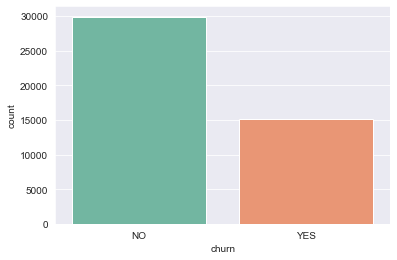

In [6]:
sns.countplot(x='churn', data=churn_data, palette="Set2")

<AxesSubplot:xlabel='Data_services', ylabel='count'>

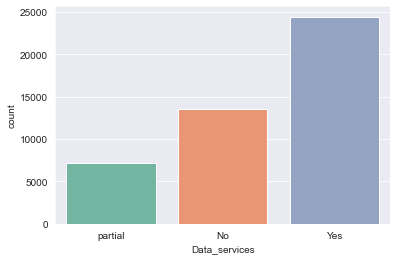

In [7]:
sns.countplot(x='Data_services', data=churn_data, palette="Set2")

<AxesSubplot:xlabel='Data_services', ylabel='count'>

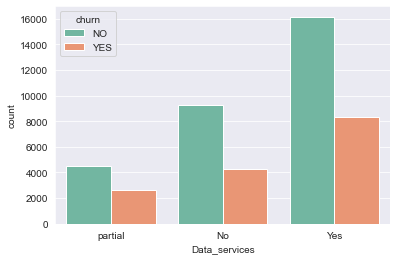

In [8]:
sns.countplot(x='Data_services', hue='churn', data=churn_data, palette="Set2")

<AxesSubplot:xlabel='churn', ylabel='Cust_age'>

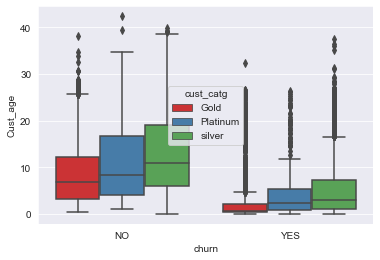

In [9]:
sns.boxplot(x='churn', y= "Cust_age", hue="cust_catg", data=churn_data, palette="Set1")

<AxesSubplot:xlabel='churn', ylabel='Avg_bill_payment'>

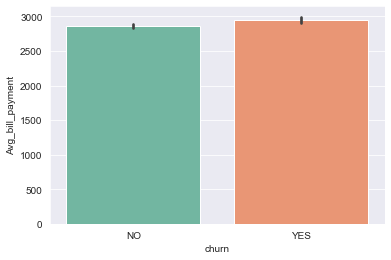

In [10]:
sns.barplot(x='churn', y= "Avg_bill_payment", data=churn_data, palette="Set2")

<AxesSubplot:xlabel='churn', ylabel='no_SRs_in_3Yrs'>

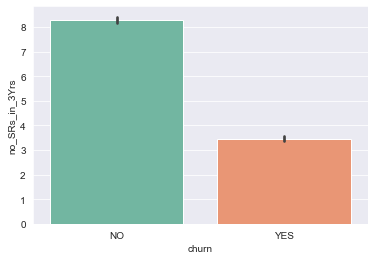

In [11]:
sns.barplot(x='churn', y= "no_SRs_in_3Yrs", data=churn_data, palette="Set2")

<AxesSubplot:xlabel='churn', ylabel='rep_SRs_in_3Yrs'>

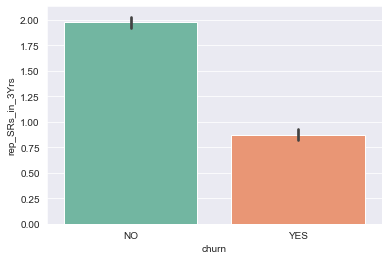

In [11]:
sns.barplot(x='churn', y= "rep_SRs_in_3Yrs", data=churn_data, palette="Set2")

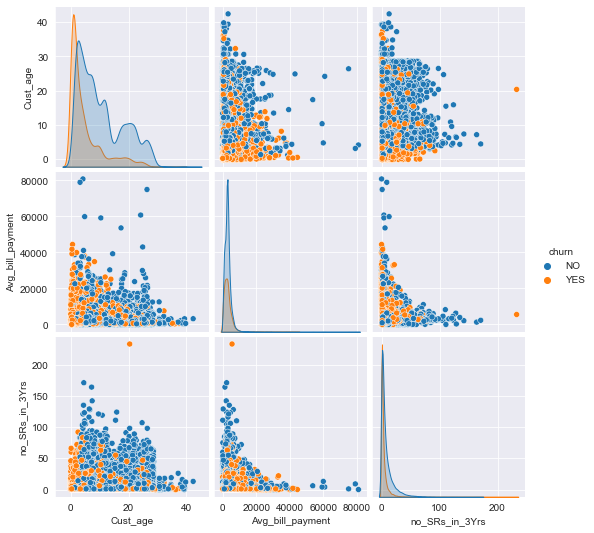

In [18]:
sns.pairplot(churn_data,vars = ['Cust_age','Avg_bill_payment','no_SRs_in_3Yrs'], hue="churn")